<h1>Pipeline</h1>

In [13]:
import numpy as np
import pandas as pd

from importlib import reload
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.15 ms (started: 2021-09-27 10:46:25 +02:00)


In [14]:
from src.data import data as data
from src.preprocessing import preprocessing as preprocess
from src.models import model as model
from src.visualization import visualize as vis

time: 353 µs (started: 2021-09-27 10:46:27 +02:00)


In [15]:
reload(data)

data_path = "../data/kddcup.data.gz"
df = data.load_data(data_path)

time: 23 s (started: 2021-09-27 10:46:29 +02:00)


In [16]:
reload(preprocess)

# Preprocessing
df_encoded = preprocess.features_encoder(df)
df_normalized = preprocess.normalize(df_encoded)
train_df, val_df, test_df = preprocess.split_data(df_normalized)

time: 46.6 s (started: 2021-09-27 10:46:54 +02:00)


In [18]:
reload(model)

# Training
retrain = False

if retrain: 

    # Paramters tested:
    parameters = {
        "n_estimators": [100, 150, 200], # Number of trees in the forest.
        "criterion": ["gini", "entropy"], # The function to measure the quality of a split.
        "max_depth": [None], # The maximum depth of the tree.
        "min_samples_split": [2], # The minimum number of samples required to split an internal node.
        "max_features": ["auto", None] # The number of features to consider when looking for the best split. 
    }
    # Best parameters: 
    # {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'max_features': None}
    
    models_dict = model.generate_models_parameters(parameters)
    best_model = model.train_validate_models(train_df, val_df, models_dict)
    print("Best model: ", best_model)
    clf = model.train_model(train_df, val_df, best_model)
    model.write_model(clf, "model_rfc_1")
else: 
    clf = model.read_model("model_rfc")

time: 33.9 ms (started: 2021-09-27 10:48:15 +02:00)


In [19]:
reload(vis)

x_test, y_test = model.get_x_y_from_df(test_df)
pred = clf.predict(x_test)
acc, correct, incorrect = vis.accuracy(y_test, pred)
print("Accuracy:", acc)
print("Correct:", correct)
print("Incorrect:", incorrect)

Accuracy: 0.9999530466593719
Correct: 979650
Incorrect: 46
time: 10.3 s (started: 2021-09-27 10:48:17 +02:00)


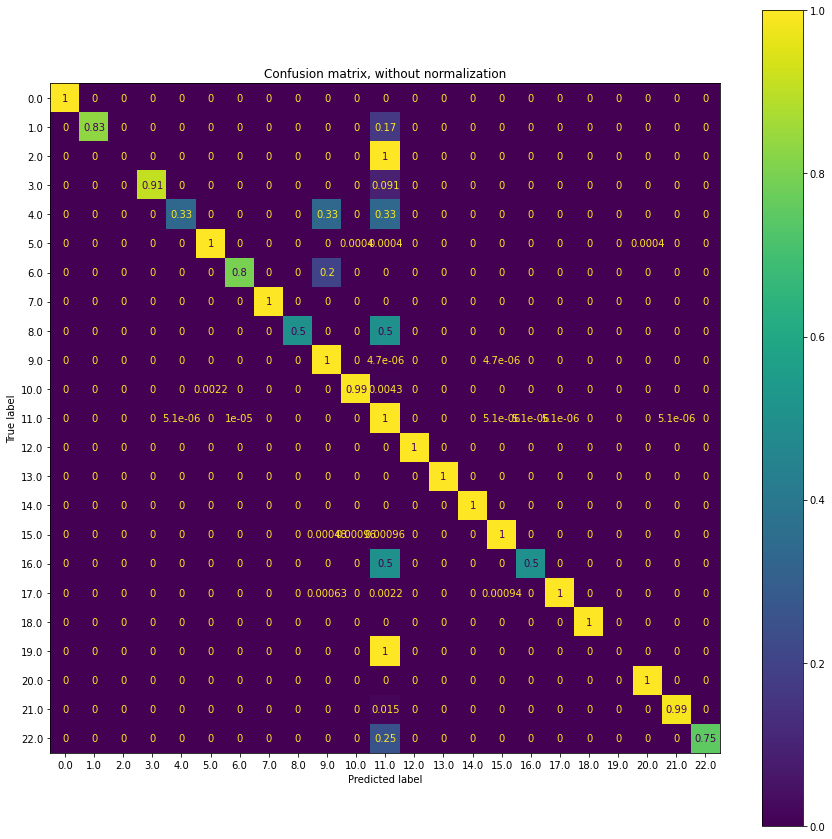

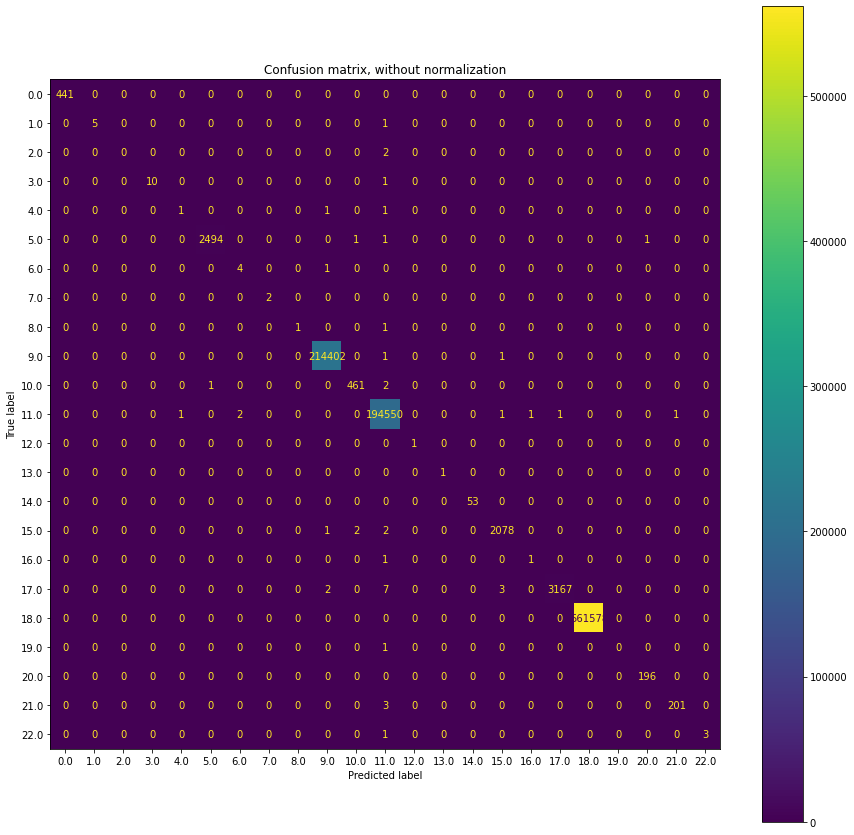

time: 23.9 s (started: 2021-09-27 10:48:31 +02:00)


In [20]:
reload(vis)

fig1, ax, fig2, ax2 = vis.get_confusion_matrix(clf, x_test, y_test, True, "confusion_matrix.png")
plt.show()